<a href="https://colab.research.google.com/github/mingshey/python_projects/blob/main/Refraction_Image_en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Refraction Image in Water

```
# created 2025-01-14 by Myungsunn Ryu
# last updated 2025-02-02.
```

## Goal: Simulating Underwater Imagery Through Grid Partitioning

**Objective:** To determine the appearance of an image as seen from above the water by dividing the underwater space into a grid.

**Simplifications:**
* **2D Plane Assumption:** The problem is simplified to a 2D normal plane (xy-plane) containing both the object and the point of view (POV). The $x$-axis is the intersection of the vertical plane and the flat water surface. The region y <= 0 is considered water, and y > 0 is air.

**Method:**
1. **Finding the Point of Incidence (POI):** Given the POV (above the water surface) and the object (OBJ) underwater, calculate the x-coordinate of the POI using Fermat's principle (principle of least time).
2. **Ray Equations:** Determine the linear equations of the rays refracted out of the water using the refraction angles of the rays emitted from the object to two points near the POI.
3. **Image Position:** Solve the simultaneous equations of the two rays to find the position of the image.
4. **Function Creation:** Create a function encapsulating steps 1-3.
5. **Grid Image:** Utilize the function from step 4 to calculate the image of the underwater grid.

## Fermat's Principle


<img src="https://drive.google.com/uc?id=1f_Qys0LxkLDem7aYUMHMtF-JZhZX3UQ1"
width=300 >


The lengths of the paths in air and water are, respectively,

${path}_1 = \sqrt{(x-A)^2 + B^2}$

${path}_2 = \sqrt{(C-x)^2 + D^2}$

And the time taken to travel each path, assuming the speed of light in each medium is $v_1$ and $v_2$, is

$t_1 = \dfrac{{path}_1}{v_1}$

$t_2 = \dfrac{{path}_2}{v_2}$

Therefore, the total time is

$t = t_1 + t_2 = \dfrac{1}{v_1}\sqrt{(x-A)^2 + B^2} + \dfrac{1}{v_2}\sqrt{(C-x)^2 + D^2}$

Multiplying the total time by the constant speed of light in a vacuum, $c$, we get

$ct = \dfrac{c}{v_1}\sqrt{(x-A)^2 + B^2} + \dfrac{c}{v_2}\sqrt{(C-x)^2 + D^2}$,

which is,

$ct = {n_1}\sqrt{(x-A)^2 + B^2} + {n_2}\sqrt{(C-x)^2 + D^2}$.

Since Fermat's principle states that the path of least time minimizes $t$, it also minimizes $ct$. Let's call this $ct$ as $t$ for convenience. That is,

$t = {n_1}\sqrt{(x-A)^2 + B^2} + {n_2}\sqrt{(C-x)^2 + D^2}$.

The path where $t$ is minimized is the value of $x$ where the derivative of $t$ with respect to $x$ is 0. Therefore,

$\newcommand{\diff}[2]{{\frac{\mathrm{d}#1}{\mathrm{d}#2}}}$


$$\diff{t}{x} = \dfrac{n_1 (x-A)}{\sqrt{B^2+(x-A)^2}} + \dfrac{n_2 (x-C)}{\sqrt{D^2 + (x-C)^2}}=0$$

The value of x that satisfies this equation gives us the point (x, 0) where the light is incident on the boundary.

In [1]:
#!pip install SciencePlots

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sym
import scipy as sci

In [3]:
#import scienceplots

In [4]:
#plt.style.use(['science', 'ieee', 'no-latex', 'grid'])
#plt.style.use(['science', 'notebook', 'grid'])
#plt.style.use(['default', 'grid'])

In [5]:
sym.init_printing()

In [6]:
# Refractive indices of air and water, respectively
n_air, n_water = 1.00, 1.33

In [7]:
N1, N2, A, B, C, D, x = sym.symbols('n_1, n_2, A B C D x')
N1, N2, A, B, C, D, x

(n₁, n₂, A, B, C, D, x)

In [8]:
# Path lengths in water and air, respectively, based on the point of incidence
path1 = sym.sqrt((x-A)**2 + B**2)
path2 = sym.sqrt((C-x)**2 + D**2)

# Total time (multiplied by the speed of light in vacuum)
t = N1*path1 + N2*path2

# t as a callable function:
tf = sym.lambdify((x, N1, N2, A, B, C, D), t)

In [9]:
t

      ________________         _______________
     ╱  2           2         ╱  2          2 
n₁⋅╲╱  B  + (-A + x)   + n₂⋅╲╱  D  + (C - x)  

In [10]:
# Derivative of total time t with respect to x: dt/dx
dtdx = sym.diff(t, x)

# Creating a callable function from dtdx:
dtdxf = sym.lambdify((x, N1, N2, A, B, C, D), dtdx)

In [11]:
dtdx

    n₁⋅(-A + x)          n₂⋅(-C + x)    
─────────────────── + ──────────────────
   ________________      _______________
  ╱  2           2      ╱  2          2 
╲╱  B  + (-A + x)     ╲╱  D  + (C - x)  

## Finding a Numerical Solution

While an analytical solution to the equation:

$$\frac{dx}{dt} = \frac{n_1 (x-A)}{\sqrt{B^2+(x-A)^2}} + \frac{n_2 (x-C)}{\sqrt{D^2 + (x-C)^2}}=0$$

could be obtained by solving a quartic equation in terms of x using SymPy, the formal expression of the solution is complicated and lacks physical intuition, and there is little computational advantage. Therefore, we have decided to resort to a numerical approach to find an approximate solution, as it is more practical.

In [12]:
pov = [0, 1]  # POV (Point of View)
obj = [1, -1] # OBJ (Object)

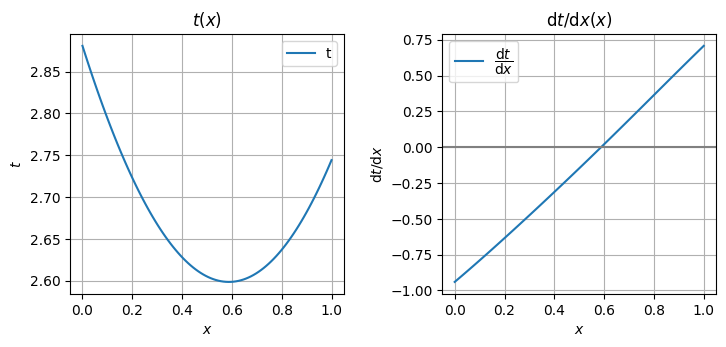

In [17]:
xs = np.linspace(0, 1, 100)
xpov, ypov = pov[0], pov[1]
xobj, yobj = obj[0], obj[1]

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
fig.tight_layout(pad=4)

axes[0].plot(xs, tf(xs, n_air, n_water, xpov, ypov, xobj, yobj), label='t')
axes[0].grid()
axes[0].set_xlabel(r'$x$')
axes[0].set_ylabel(r'$t$')
axes[0].title.set_text(r'$t(x)$')
axes[0].legend()

axes[1].plot(xs, dtdxf(xs, n_air, n_water, xpov, ypov, xobj, yobj), label=r'$\dfrac{\mathrm{d}t}{\mathrm{d}x}$')
axes[1].axhline(0, c='gray')
axes[1].grid()
axes[1].set_xlabel(r'$x$')
axes[1].set_ylabel(r'$\mathrm{d}t/\mathrm{d}x$')
axes[1].title.set_text(r'$\mathrm{d}t/\mathrm{d}x(x)$')
axes[1].legend()


plt.savefig('tf_dtdxf.png')
plt.savefig('tf_dtdxf.svg')

In [18]:
sol = sci.optimize.root(lambda x: dtdxf(x, n_air, n_water, xpov, ypov, xobj, yobj), xobj)
# This is better than
# '''
#  sol = sci.optimize.minimize_scalar(lambda x: tf(x, n_air, n_water, xpov, ypov, xobj, yobj), bounds=(xpov, xobj)),
#  '''
# for convergence
sol.x[0]

0.5878671239391607

In [19]:
tf(sol.x[0], n_air, n_water, xpov, ypov, xobj, yobj)

2.5985196157340535

In [20]:
dtdxf(sol.x[0], n_air, n_water, xpov, ypov, xobj, yobj)

0.0

xPOI = 0.5878671239391607


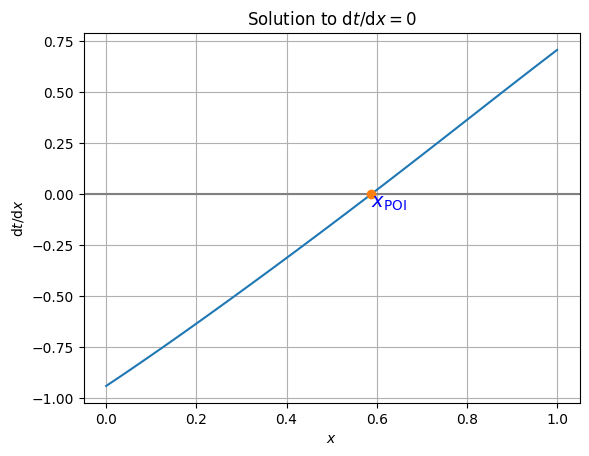

In [22]:
func1 = lambda x: dtdxf(x, n_air, n_water, xpov, ypov, xobj, yobj)

sol = sci.optimize.root(func1, obj[0], tol=1e-9)
xPOI = sol.x[0]
print(f"xPOI = {xPOI}")

xs = np.linspace(0, 1, 100)
plt.plot(xs, func1(xs))
plt.grid()
plt.xlabel(r'$x$')
plt.ylabel(r'$\mathrm{d}t/\mathrm{d}x$')
plt.axhline(0,c='gray')

plt.plot(xPOI, 0, 'o')
plt.text(xPOI, 0, r'$x_{\mathrm{POI}}$', va='top', c='b', fontsize=14)
plt.title(r'Solution to $\mathrm{d}t/\mathrm{d}x = 0$')

plt.show()

In [23]:
# Checking if Snell's law is satisfied

sin1 = (pov[0] - xPOI) / np.sqrt((xPOI - pov[0])**2 + pov[1]**2)
sin2 = -(obj[0] - xPOI) / np.sqrt((xPOI - obj[0])**2 + obj[1]**2)
print(f"Is n1 sin1 = n2 sin2? \n{n_air * sin1 == n_water * sin2}")

Is n1 sin1 = n2 sin2? 
True


In [24]:
# Ray Path
pts = np.array([obj, [xPOI, 0], pov])

Text(0.5878671239391607, 0, 'POI')

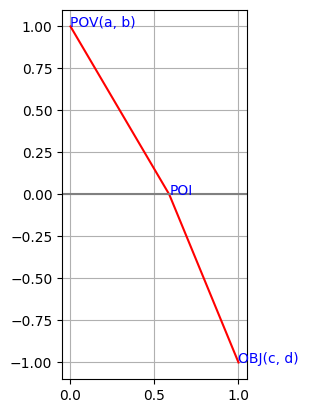

In [25]:
# Plotting the Path of a Ray
plt.axes().set_aspect('equal')
plt.plot(pts.T[0], pts.T[1], 'r')
plt.axhline(0, c='gray')
plt.grid()
plt.text(xpov, ypov, 'POV(a, b)', color='b')
plt.text(xobj, yobj, 'OBJ(c, d)', color='b')
plt.text(xPOI, 0, 'POI', color='b')

## Equations of Two Rays Passing Through Two Points Near the Point of Incidence and Emerging from Water


In [26]:
## Paths of Other Rays Near the Point of Incidence

# Setting a small delta for calculations:**
delta = 3e-2

xm, xp = xPOI - delta, xPOI + delta
x2, y2 = obj
dxm = xm - x2
dxp = xp - x2
d = y2

sin2m = dxm / np.sqrt(dxm**2 + d**2)
sin2p = dxp / np.sqrt(dxp**2 + d**2)

# Applying Snell's law:
sin1m = n_water / n_air * sin2m
sin1p = n_water / n_air * sin2p

# Simplified handling of total internal reflection.
if sin1m > 1:
  sin1m = 1
if sin1p > 1:
  sin1p = 1

# Calculating the endpoints (s1m, s1p) of the unit vectors in
# the direction of the refracted rays (outside water):
x1m = sin1m
x1p = sin1p

y1m = np.sqrt(1-x1m**2)
y1p = np.sqrt(1-x1p**2)

s1m = np.array([xm+x1m, y1m])
s1p = np.array([xp+x1p, y1p])

In [27]:
# Coefficients of linear equations for two rays from the object near the point of incidence
pcm = np.polyfit(np.array([xm, xm+x1m]), np.array([0, y1m]), 1)
pcp = np.polyfit(np.array([xp, xp+x1p]), np.array([0, y1p]), 1)

In [28]:
print(pcm)
print(pcp)

[-1.56756984  0.87449568]
[-1.85383977  1.14542665]


In [29]:
# Assuming pcm and pcp are lists or arrays containing coefficients of two lines
pfm = np.poly1d(pcm)  # Create a polynomial from coefficients pcm
pfp = np.poly1d(pcp)  # Create a polynomial from coefficients pcp

print(pfm)  # Print the first polynomial
print(pfp)  # Print the second polynomial

 
-1.568 x + 0.8745
 
-1.854 x + 1.145


## Coordinates of the Image

In [32]:
## Numerical Solution of Two Linear Equations:

# Define a function eqn2 to represent the difference between pfm(x) and pfp(x)
eqn2 = lambda x: pfm(x) - pfp(x)

# Find the root of eqn2, starting from the initial guess c
sol2 = sci.optimize.root(eqn2, xobj)

# Extract the x-coordinate of the solution
ix = sol2.x[0]

# Calculate the corresponding y-coordinate using the polynomial pcm
iy = np.poly1d(pcm)(ix)

# Print the solution (x, y)
print(ix, iy)

0.9464178427677785 -0.6090803888696094


## System of Linear Equations

The solution to the system of linear equations:
$$ \left\{\begin{aligned}
y &= ax + b\\
y &= cx + d \end{aligned} \right. $$
is obtained by:

From $ (a - c) x  + (b - d) = 0$,
we get

$ x = -\dfrac{b - d}{a - c}$

$ y = -a\dfrac{b - d}{a - c}+m =\dfrac{a d - b c}{a - c}$

Therefore, ...

In [33]:
# Extract coefficients
a, b = pcm
c, d = pcp

# Calculate the intersection point of the two lines
ix = - (b - d) / (a - c)  # x-coordinate of the intersection point
iy = (a * d - b * c) / (a - c)  # y-coordinate of the intersection point

print(ix, iy)  # Print the coordinates of the intersection point

0.9464178427677782 -0.6090803888696085


In [34]:
# Alternative calculation using vectorized operations
# Although less readable, it can be more efficient for large datasets
a_c, b_d = pcm - pcp  # Calculate a - c and b - d simultaneously
ix = - b_d / a_c
iy = np.cross(pcm, pcp) / a_c  # Using cross product for a more concise calculation
print(ix, iy)

0.9464178427677782 -0.6090803888696085


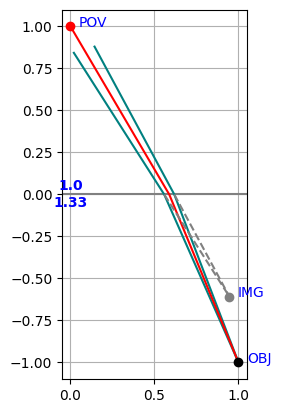

In [36]:
# Plotting the ray connecting the POV (Point of View) and the object (OBJ), the ray near the point of incidence (POI),
# and the extension of the refracted paths of the two rays and their intersection point (IMG; image)
plt.axes().set_aspect('equal')

plt.axhline(0, c='gray')
plt.text(pov[0], 0.01, str(n_air), color='b', va='bottom', ha='center', weight='bold')
plt.text(pov[0], -0.01, str(n_water), color='b', va='top', ha='center', weight='bold')

plt.grid()
pathm = np.array([obj, [xm, 0], s1m])
pathp = np.array([obj, [xp, 0], s1p])

plt.plot(pathm.T[0], pathm.T[1], 'teal')
plt.plot(pathp.T[0], pathp.T[1], 'teal')
plt.plot(pov[0], pov[1], 'o', color='r', zorder=4)
plt.plot(obj[0], obj[1], 'o', color='k', zorder=4)
plt.text(pov[0]+0.05, pov[1], 'POV', color='b')
plt.text(obj[0]+0.05, obj[1], 'OBJ', color='b')

plt.plot([xm, ix], [0, iy],color='gray', linestyle='--', zorder=3)
plt.plot([xp, ix], [0, iy],color='gray', linestyle='--', zorder=3)
plt.plot(ix, iy, 'o', color='gray', zorder=4)
plt.text(ix+0.05, iy, 'IMG', color='b')

plt.plot(pts.T[0], pts.T[1], 'r')

Here's a function to calculate the coordinates of the image, following the method described above:

In [37]:
## Function to find the image position

# Function to find the image position given the object's position,
# the viewpoint, and the relative refractive index

def refimg_mp(pov, obj, nrel):
  """
  pov: [xp, yp]; viewpoint
  obj: [xo, yo]; object's position
  nrel: Relative refractive index of the medium containing the object to the medium containing the POV, nrel = nPOV / nOBJ
        Example: If POV is in n1 and OBJ is in n2, then nrel=n2/n1
  """
  xp, yp = pov[0], pov[1]
  xo, yo = obj[0], obj[1]
  xPOI = sci.optimize.root(lambda x: dtdxf(x, 1, nrel, xp, yp, xo, yo), xo).x[0]

  delta = 1e-8
  xm, xp = xPOI - delta, xPOI + delta
  dxm = xm - xo
  dxp = xp - xo
  d = yo

  sin2m = dxm / np.sqrt(dxm**2 + d**2)
  sin2p = dxp / np.sqrt(dxp**2 + d**2)

  sin1m = nrel * sin2m
  sin1p = nrel * sin2p

  if sin1m > 1:
    sin1m = 1
  if sin1p > 1:
    sin1p = 1

  x1m = sin1m
  x1p = sin1p

  # The direction of the refracted ray is towards the POV, so we use the np.sign() function in the following equation to reflect this:
  y1m = np.sqrt(1-x1m**2) * np.sign(pov[1])
  y1p = np.sqrt(1-x1p**2) * np.sign(pov[1])

#  s1m = np.array([xm+x1m, y1m])
#  s1p = np.array([xp+x1p, y1p])

  pcm = np.polyfit(np.array([xm, xm + x1m]), np.array([0, y1m]), 1)
  pcp = np.polyfit(np.array([xp, xp + x1p]), np.array([0, y1p]), 1)

  a, b = pcm
  c, d = pcp

  ix = -(b - d) / (a - c)
  iy = (a * d - b * c) / (a - c)

  return np.array([ix, iy])

In [38]:
refimg_mp([0,1], [1,-1], n_water/n_air)

array([ 0.94617529, -0.60950537])

## Image Coordinates (2)

### Analytical Calculation of Image Coordinates Given the Point of Incidence

Given a point of incidence POI$(x_{\mathrm{POI}}, 0)$ and a point of view POV$(A, B)$, let $k$ be the slope of the line passing through POI and POV.
$$k=\cot \theta_1$$
And the equation of the line is
$$y=k(x-x_{\mathrm{POI}})$$

$\newcommand{\nrel}{{n_{\mathrm{rel}}}}$
$\newcommand{\xpoi}{{x_{\mathrm{POI}}}}$
Let $\nrel = \frac{n_2}{n_1}$ be the relative refractive index. From the law of refraction, we have
$$\sin\theta_1 =  \nrel \sin\theta_2$$
and
$$\tan \theta_2 = \frac{x_{\mathrm{POI}} - C}{D}$$
Therefore,

$$\theta_1 = \arcsin \left( \nrel \sin\theta_2 \right),$$

$$k = \cot \theta_1 = \cot\left\{ \arcsin \left( \nrel \sin\theta_2 \right) \right\} = \dfrac{\sqrt{1 - \nrel^2 \sin^2 \theta_2}}{\nrel\sin\theta_2}$$

Let $ a \equiv \xpoi - C$, then
$$\tan \theta_2 = \frac{\xpoi - C}{D} = \frac{a}{D},$$
$$ \sin\theta_2 = \frac{a}{\sqrt{D^2+a^2}} $$

The y-coordinate $b$ of the point where the extension of the refracted ray intersects the line $x=C$ is
$$\begin{aligned}
b &= k(C-\xpoi)\\
  &= -D\dfrac{\sin\theta_2}{\cos\theta_2}\dfrac{\sqrt{1 - \nrel^2 \sin^2 \theta_2}}{\nrel\sin\theta_2}
\end{aligned}
$$

Let $\alpha =  \dfrac{a}{D/\sqrt{\nrel^2-1}}$, $\beta=\dfrac{b}{D/\nrel}$, then
$$
\begin{aligned}
\alpha^2 + \beta^2 &= \dfrac{\nrel^2-1}{D^2}a^2 + \dfrac{\nrel^2}{D^2}b^2\\
   &= \dfrac{\nrel^2-1}{D^2}D^2 \dfrac{\sin^2\theta_2}{\cos^2\theta_2} + \dfrac{\nrel^2}{D^2}D^2\dfrac{1-\nrel^2\sin^2\theta_2}{\nrel^2\cos^2\theta_2}\\
   &= \dfrac{\nrel^2\sin^2\theta_2-\sin^2\theta_2}{\cos^2\theta_2} + \dfrac{1-\nrel^2\sin^2\theta_2}{\cos^2\theta^2}\\
   &=\dfrac{1-\sin^2\theta_2}{\cos^2\theta_2}\\
   &= 1
\end{aligned}
$$

Let $M=\dfrac{D}{\sqrt{\nrel^2 - 1}}$, $N=\dfrac{D}{\nrel}$, then on the plane with horizontal axis $\xi = \dfrac{x-C}{M}$ and vertical axis $\eta = \dfrac{y}{N}$, the envelope of the line segments connecting the points $(\alpha,0)$ and $(0, \beta)$ satisfying $\alpha^2 + \beta^2 = 1$ is a well-known astroid curve. The coordinates of the tangent point of the line segment and the envelope are $(\xi, \eta) = (\alpha^3, \beta^3)$, and this curve satisfies the equation

$$ \left| \xi \right|^{2/3}+\left| \eta \right|^{2/3}=1$$

<img src="https://drive.google.com/uc?id=1Q0L1oG94te8-ttEnKOvKQ413V3pqqTND"
width=350 >

In the $xy$ plane,
$$ \left| \dfrac{x - C}{M} \right|^{2/3} + \left| \dfrac{y}{N} \right|^{2/3} = 1$$



Therefore, the coordinates of the image $(x,\ y)$ are
$$ \left\{\begin{aligned}
x &= C + M \cdot \alpha^3 \\
  &= C + (\nrel^2-1)\dfrac{a^3}{D^2},\\
y &= N \cdot \beta^3 = N \left( 1-\alpha^2 \right)^{3/2}\\
  &= \dfrac{D}{\nrel} \left\{1-\left(\nrel^2 - 1\right)\dfrac{a^2}{D^2}\right\}^{3/2}
\end{aligned} \right.
$$


### Let's find the equation of the envelope directly:

$$
\DeclareMathOperator{\sgn}{sgn}
\begin{aligned}
k &= \dfrac{\sqrt{1 - \nrel^2 \dfrac{a^2}{D^2+a^2}}}{\left(\nrel \dfrac{a}{\sqrt{D^2+a^2}}\right)} = \dfrac{\sqrt{D^2+a^2 - \nrel^2 a^2}}{\nrel a}\\
&= \dfrac{\left| a \right|}{a} \sqrt{\dfrac{1}{\nrel^2}\left(\dfrac{D^2}{a^2}+1\right)-1} \\
&= \sgn( a ) \sqrt{\dfrac{1}{\nrel^2}\left(\dfrac{D^2}{a^2}+1\right)-1}.
\end{aligned}$$

Therefore, the equation of the line is

$$ y = \sgn( a ) \sqrt{\dfrac{1}{\nrel^2}\left(\dfrac{D^2}{a^2}+1\right)-1} (x-a-C) .$$

<img src="https://drive.google.com/uc?id=1t_NkpEldU_CXCfGIM0uGbb0XQxy_uCwl"
width=450 >

As α varies based on the position of the object, the point on the envelope formed by the change in the above line satisfies ${\partial y}/{\partial a} = 0$, so

$$  \dfrac{\partial y}{\partial a} = \sgn(a)\left[ \dfrac{1}{2}\dfrac{-2\dfrac{1}{\nrel^2}\dfrac{D^2}{a^3}}{\sqrt{\dfrac{1}{\nrel^2}\left(\dfrac{D^2}{a^2}+1\right)-1}}(x-a-C) - \dfrac{\dfrac{1}{\nrel^2}\left(\dfrac{D^2}{a^2}+1\right)-1}{\sqrt{\dfrac{1}{\nrel^2}\left(\dfrac{D^2}{a^2}+1\right)-1}}\right] = 0$$

$$ \begin{aligned}
x - a - C &= \dfrac{\nrel^2 a^3}{D^2} \left\{1 - \dfrac{1}{n_{\mathrm{rel}}^2}\left(\dfrac{D^2}{a^2}+1 \right)\right\}\\
&=(n_{\mathrm{rel}}^2 - 1) \dfrac{a^3}{D^2} - a
\end{aligned}
$$

Therefore, the envelope is given by the parametric equation with parameter α as follows:

$$ \left\{
\begin{array}{l}
x = C + (\nrel^2 - 1)\dfrac{a^3}{D^2},\\
y = \dfrac{\left| a \right|}{a} \sqrt{\dfrac{1}{\nrel^2}\left(\dfrac{D^2}{a^2}+1\right)-1} \left\{\left(\nrel^2 - 1\right)\dfrac{a^3}{D^2} - a\right\}\\
\hphantom{y} = \sqrt{\dfrac{1}{\nrel^2}\left(D^2+a^2\right)-a^2} \left\{\left(\nrel^2 - 1\right)\dfrac{a^2}{D^2} - 1\right\}\\
\hphantom{y} = -\dfrac{\left|D\right|}{\nrel} \left\{1-\left(\nrel^2 - 1\right)\dfrac{a^2}{D^2}\right\}^{3/2}.
\end{array}
\right.
$$

$$ \left| a \right| \le \dfrac{ \left| D \right|}{\sqrt{\nrel^2-1}} $$

This is the same result as obtained using the astroid curve.

(e.g.) Here, when $a=0$, we have $x=C$ and $y=-\dfrac{\left|D\right|}{\nrel}$.

When the equation of the envelope is arranged, and since $D < 0$, therefore $\left| D \right| = -D$.
Therefore, when we let
$$ p \equiv \alpha^2 = \left(\nrel^2 - 1\right)\dfrac{a^2}{D^2}, $$
the equations become
$$
\left\{
\begin{array}{l}
x = C + p\,a,\\
y = \dfrac{D}{\nrel} \left( 1-p \right)^{3/2}.
\end{array}
\right.
$$

In [39]:
# The coordinates of the image found using the above method:

a = xPOI - xobj
nrel = n_water/n_air
p = (nrel**2 - 1) * (a/yobj)**2
xi = xobj + p * a
yi = yobj / nrel * ( 1 - p ) ** 1.5
print(xi, yi)

0.9461752972190999 -0.6095053774720374


In [40]:
# astroid equation solver

# Parameters:
#   xPOI: x-coordinate of the point of intersection
#   (c, d): coordinates of the object
#   nrel: refractive index

a = xPOI - xobj
M = yobj / np.sqrt(nrel**2 - 1)
N = yobj / nrel

alpha = a / M
beta = np.sqrt(1 - alpha**2)

# coordinates of the image: (xip, yip)
xip = xobj + M * alpha**3
yip = N * beta**3

print(xip, yip)

0.9461752972190999 -0.6095053774720375


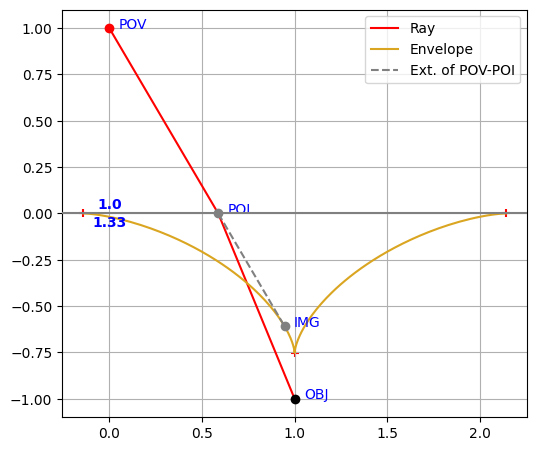

In [41]:
# When the ray connecting the POV (Point of View) and the object (OBJ)
# and the point of incidence (POI) change, we draw the envelope of the
# straight line extending the refracted ray.

alim = np.abs(yobj) / np.sqrt((n_water/n_air)**2 - 1)
avals = np.linspace(-alim, alim, 201)
ps = ((n_water/n_air)**2 - 1) * (avals/yobj)**2
xis = xobj + ps * avals
yis = -np.abs(yobj) / nrel * ( 1 - ps ) ** 1.5

plt.figure(figsize=(6, 9))
plt.axes().set_aspect('equal')
plt.grid()

# surface of water
plt.axhline(0, c='gray', zorder=4)

# refraction indices
plt.text(xpov, 0.01, str(n_air), color='b', va='bottom', ha='center', weight='bold')
plt.text(xpov, -0.01, str(n_water), color='b', va='top', ha='center', weight='bold')

# POV
plt.plot(xpov, ypov, 'o', color='r', zorder=4)
plt.text(xpov+0.05, ypov, 'POV', color='b')

# OBJ
plt.plot(xobj, yobj, 'o', color='k', zorder=4)
plt.text(xobj + 0.05, yobj, 'OBJ', color='b')

# POI
plt.plot(xPOI, 0, 'o', color='gray', zorder=4)
plt.text(xPOI+0.05, 0, 'POI', color='b')

# IMG
plt.plot(xi, yi, 'o', color='gray', zorder=4)
plt.text(xi+0.05, yi, 'IMG', color='b')

# the ray from OBJ through POI to POV
plt.plot(pts.T[0], pts.T[1], 'r', label="Ray")

# envelope of the ray from POI to POV extended
plt.plot(xis, yis, 'goldenrod', label='Envelope')

# limits of the envelope
plt.scatter([xobj-alim, xobj+alim], [0,0], color='r', marker="+")
plt.scatter(xobj, yobj/nrel, color='r', marker="+")

# extension of the ray from POI to POV
plt.plot([xPOI, xi], [0, yi],color='gray', linestyle='--',\
         zorder=3, label="Ext. of POV-POI")

plt.legend()

plt.savefig('envelopes.png')
plt.savefig('envelopes.svg')

If we create a function to find the coordinates of the image as a point on the envelope, it would look like this:

In [42]:
# Function to find the image position
# Takes the object's position, the viewpoint, and the relative refractive index as inputs and returns the image position

def refimg(pov, obj, nrel):
  '''
  pov: [a, b]; viewpoint
  obj: [c, d]; object position
  nrel: relative refractive index of the medium containing the OBJ to the
        medium containing the POV, nrel = nOBJ / nPOV
        e.g.: When POV is in n1 and OBJ is in n2, nrel=n2/n1
  === return values ===
  img: [xi, yi]; a point on the envelope
  poi: [xPOI, 0]; point of incidence
  '''
  xpov, ypov = pov
  xobj, yobj = obj
  xPOI = sci.optimize.root(lambda x: dtdxf(x, 1, nrel, xpov, ypov, xobj, yobj), xobj).x[0]

  a = xPOI - xobj
  p = (nrel**2 - 1) * (a/yobj)**2
  xi = xobj + p * a
  yi = yobj / nrel * ( 1 - p ) ** 1.5
  img = np.array([xi, yi])
  poi = np.array([xPOI, 0])

  return img, poi

In [43]:
refimg([0,1], [1,-1], n_water/n_air)

(array([ 0.9461753 , -0.60950538]), array([0.58786712, 0.        ]))

## A grid (object) placed in a body of water

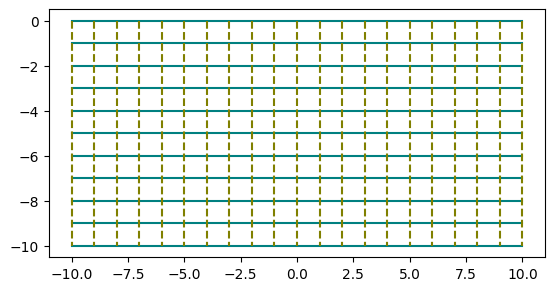

In [44]:
N = 200

class hline():
  def __init__(self, a, b, y):
    self.xs = np.linspace(a, b, N+1)
    self.ys = np.ones_like(self.xs) * y
    self.color = 'teal'
    self.ls = '-'
    self.label = None

  def set_color(self, color):
    self.color = color

  def set_linestyle(self, ls):
    self.ls = ls

  def draw(self):
    plt.plot(self.xs, self.ys, self.color, ls=self.ls, label=self.label)

class vline():
  def __init__(self, c, d, x):
    self.ys = np.linspace(c, d, N+1)
    self.xs = np.ones_like(self.ys) * x
    self.color = 'olive'
    self.ls = '--'
    self.label = None

  def set_color(self, color):
    self.color = color

  def set_linestyle(self, ls):
    self.ls = ls

  def draw(self):
    plt.plot(self.xs, self.ys, self.color, ls=self.ls, label=self.label)

class xygrid():
  def __init__(self, xrange, yrange, xnum, ynum):
    self.a, self.b = xrange
    self.c, self.d = yrange
    xstep = (xrange[1] - xrange[0]) / xnum
    ystep = (yrange[1] - yrange[0]) / ynum
    self.hors = [hline(self.a, self.b, yrange[0] + ystep * k) for k in range(ynum+1)]
    self.vers = [vline(self.c, self.d, xrange[0] + xstep * j) for j in range(xnum+1)]
    self.hlabel = None
    self.vlabel = None

  def draw(self):
    for ho in self.hors:
      ho.draw()
    for vo in self.vers:
      vo.draw()

# Grid object below water surface
xrange = [-10, 10]
yrange = [0, -10]
xnum = 20
ynum = 10

obj1 = xygrid(xrange, yrange, xnum, ynum)

obj1.hors[0].label = 'object'
obj1.vers[0].label = 'object'

plt.axes().set_aspect('equal')
obj1.draw()

#plt.grid()

## Image Seen from Above Water

<lambdifygenerated-2>:2: RuntimeWarning: invalid value encountered in divide
  return n_1*(-A + x)/sqrt(B**2 + (-A + x)**2) + n_2*(-C + x)/sqrt(D**2 + (C - x)**2)
<ipython-input-42-eff2d57d41a4>:20: RuntimeWarning: invalid value encountered in scalar divide
  p = (nrel**2 - 1) * (a/yobj)**2


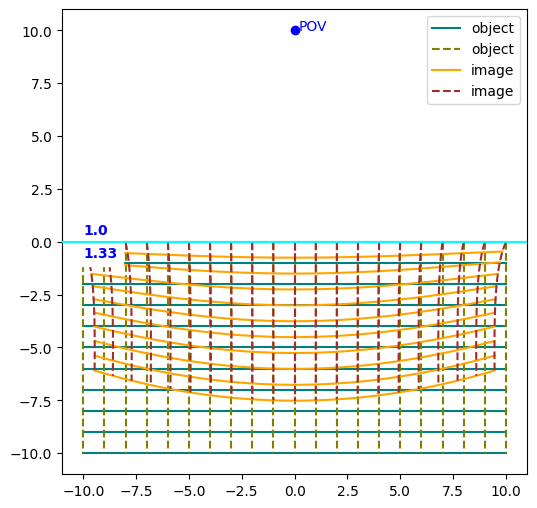

In [45]:
pov = [0, 10]

class iline():
  def __init__(self, obj):
    self.xs = obj.xs
    self.ys = obj.ys
    self.color = 'gray'
    self.ls = '-'
    self.label = None
    self.imageloc = np.empty((0, 2))
    self.OBJs = np.empty((0, 2))

  def set_color(self, color):
    self.color = color

  def set_linestyle(self, ls):
    self.ls = ls

  def calc_xy(self, POV, nrel):
    self.OBJs = np.array([self.xs, self.ys]).T
    self.imageloc = np.array([refimg(POV, obj, nrel)[0] for obj in self.OBJs])

  def draw(self):
    plt.plot(self.imageloc.T[0], self.imageloc.T[1], self.color, ls=self.ls, label=self.label)
#
# 격자 모양 물체의 상
plt.figure(figsize=(6, 9))
plt.axes().set_aspect('equal')

himgs = [iline(hl) for hl in obj1.hors]
vimgs = [iline(vl) for vl in obj1.vers]

himgs[0].label = 'image'
vimgs[0].label = 'image'

obj1.draw()

for hi in himgs:
  hi.calc_xy(pov, n_water/n_air)
  hi.set_color('orange')
  hi.set_linestyle('-')
  hi.draw()

for vi in vimgs:
  vi.calc_xy(pov, n_water/n_air)
  vi.set_color('brown')
  vi.set_linestyle('--')
  vi.draw()

plt.plot(pov[0], pov[1], 'o', color='b')
plt.text(pov[0]+0.2, pov[1], 'POV', color='b')

#plt.grid()

plt.text(xrange[0], 0.2, str(n_air), color='b', va='bottom', ha='left', \
         weight='bold', backgroundcolor='white')
plt.text(xrange[0], -0.2, str(n_water), color='b', va='top', ha='left', \
         weight='bold', backgroundcolor='white')
plt.axhline(0, c='cyan', zorder=3)

plt.legend(loc='upper right')

* When viewed from a height significantly greater than the depth of the water, there are no significant peculiarities other than slight distortions, and the overall depth appears to be shallower by a ratio approximately equal to the refractive index.

## Class for Finding the Image Given a POV

In [46]:
class refraction_image():
  def __init__(self, obj, pov, nrel):
    self.hlines = obj.hors
    self.vlines = obj.vers
    self.pov = pov
    self.nrel = nrel
    self.himgs = [iline(hl) for hl in self.hlines]
    self.vimgs = [iline(vl) for vl in self.vlines]
    self.himgs[0].label = 'image'
    self.vimgs[0].label = 'image'
    self.legend_loc = 'upper right' if nrel > 1 else 'lower right'

    for hi in self.himgs:
      hi.set_color('orange')
      hi.set_linestyle('-')
    for vi in self.vimgs:
      vi.set_color('brown')
      vi.set_linestyle('--')
    for hi in self.himgs:
      hi.calc_xy(self.pov, self.nrel)
    for vi in self.vimgs:
      vi.calc_xy(self.pov, self.nrel)

  def draw(self):
    #plt.grid()
    plt.plot(self.pov[0], self.pov[1], 'o', color='b')
    plt.text(self.pov[0]+0.2, self.pov[1], 'POV', color='b')
    xn = self.hlines[0].xs[0]

    for hi in self.himgs:
      hi.draw()
    for vi in self.vimgs:
      vi.draw()

    plt.text(xn, 0.2, str(n_air), color='b', va='bottom', ha='left',\
             weight='bold', backgroundcolor='white')
    plt.text(xn, -0.2, str(n_water), color='b', va='top', ha='left', \
             weight='bold', backgroundcolor='white')

    plt.axhline(0, c='cyan', zorder=3, label='water surface')


    plt.legend(loc=self.legend_loc)
#

<ipython-input-42-eff2d57d41a4>:20: RuntimeWarning: invalid value encountered in scalar divide
  p = (nrel**2 - 1) * (a/yobj)**2


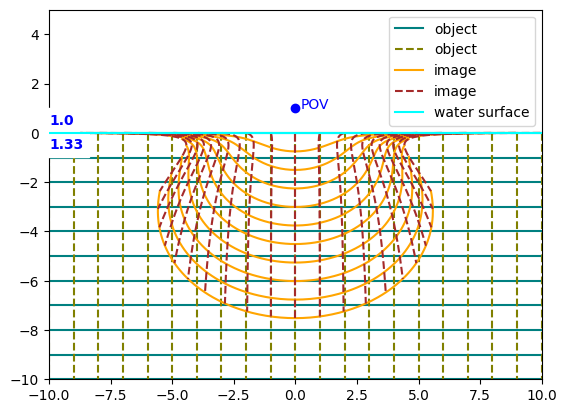

In [47]:
pov1 = [0, 1]
img1 = refraction_image(obj1, pov1, n_water/n_air)

plt.axes().set_aspect('equal')
plt.xlim(-10, 10)
plt.ylim(-10, 5)
obj1.draw()
img1.draw()

plt.savefig('fishjar.png')
plt.savefig('fishjar.svg')

* When viewing from very close to the water surface compared to the depth, the area directly below the POV appears shallower due to the refractive index ratio, but the surrounding space appears compressed into a small, fishbowl-shaped space.

<ipython-input-42-eff2d57d41a4>:20: RuntimeWarning: invalid value encountered in scalar divide
  p = (nrel**2 - 1) * (a/yobj)**2


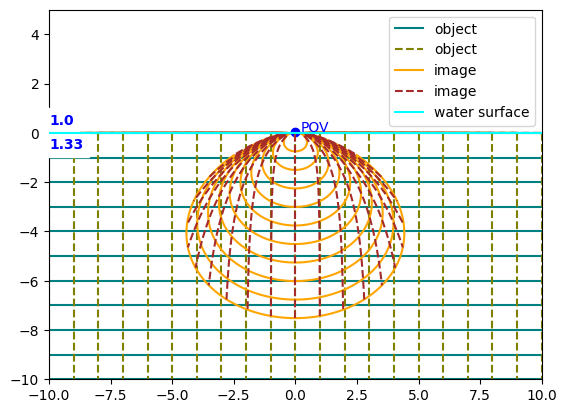

In [48]:
pov2 = [0, delta]
img2 = refraction_image(obj1, pov2, n_water/n_air)

plt.axes().set_aspect('equal')
plt.xlim(-10, 10)
plt.ylim(-10, 5)
obj1.draw()
img2.draw()

plt.savefig('seashell_shape.png')
plt.savefig('seashell_shape.svg')

* When viewed extremely close to the water surface, the entire underwater space appears compressed into a small space (inside the image of the bottom plane) where the length, width, and depth are all proportional to the depth of the water. The depth of the image is the depth of the water divided by the relative refractive index.

# The View of the Above-Water Space from Underwater (Snell's Window)

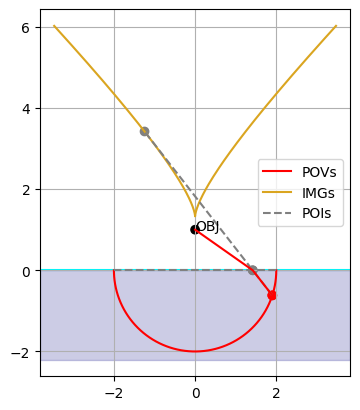

In [50]:
o2 = [0,1]
phis = np.linspace(0, np.pi, 201)
r = 2
xs = r * np.cos(phis)
ys = -r * np.sin(phis)
imgpois = np.array([refimg([x,y], o2, 1/1.33) for x, y in zip(xs, ys)])
imgs, pois = np.moveaxis(imgpois, 0,-1)

k=20
sample = np.array([[xs[k], ys[k]], [pois[0][k], pois[1][k]], [imgs[0][k], imgs[1][k]]])
ray = np.array([[o2[0], o2[1]], [pois[0][k], pois[1][k]], [xs[k], ys[k]]])

plt.figure(figsize=(4, 6))
plt.axes().set_aspect('equal')

plt.grid()
plt.plot(xs, ys, 'r-', label="POVs")
plt.axhline(0, c='cyan', zorder=-3)
plt.axhspan(0, -1.1*r, color='navy', alpha=0.2, zorder=-3)
plt.plot(imgs[0], imgs[1], ls='-', color='goldenrod', label="IMGs")
plt.plot(pois[0], pois[1], '--', color='gray', label="POIs")
plt.plot(sample.T[0], sample.T[1], ls='--', color='gray')
plt.scatter(sample.T[0], sample.T[1], color=['r', 'gray', 'gray'])
plt.plot(ray.T[0], ray.T[1], color='r')
plt.scatter(ray.T[0], ray.T[1], color=['k', 'gray', 'r'])
plt.text(o2[0], o2[1], "OBJ")
plt.legend()

When an object is in the air and the observer is in water, considering that $\nrel = \dfrac{n_{\mathrm{air}}}{n_{\mathrm{water}}}<1$ and rearranging the equation, the locus of the image as the observation point changes is

$$ \left| \xi \right|^{2/3} - \left| \eta \right|^{2/3} = -1$$

where
$$ \xi = \dfrac{x-C}{W}, \eta=\dfrac{y}{Z}$$ and $$W = \dfrac{D}{\sqrt{1-\nrel'^2}}, Z = \dfrac{D}{\nrel'}, \nrel' = \dfrac{n_{\mathrm{air}}}{n_{\mathrm{water}}}.$$

Although this equation of the locus resembles the astroid equation, it is a completely different curve due to the difference in signs. Since the astroid is a type of *superellipse*, this curve could be called a *super-hyperbola* or *superbola*, although neither is an official name. It doesn't have asymptotes, but its slope converges to $\pm Z/W = \pm \nrel'/\sqrt{1-\nrel'^2}$


* Define a grid structure in the space above the water,
* Find the image of the grid as seen from a point of view (POV) underwater.

In [51]:
# The POV is placed at y < 0, and the object is placed at y > 0.
# The relative refractive index is the ratio of the refractive index of the medium containing the object (n1) to the refractive index of the medium where the observer is located (n2).
refimg(pov=[0, -1], obj=[1, 1], nrel=n_air/n_water)

(array([1.08830882, 1.64067461]), array([0.41213288, 0.        ]))

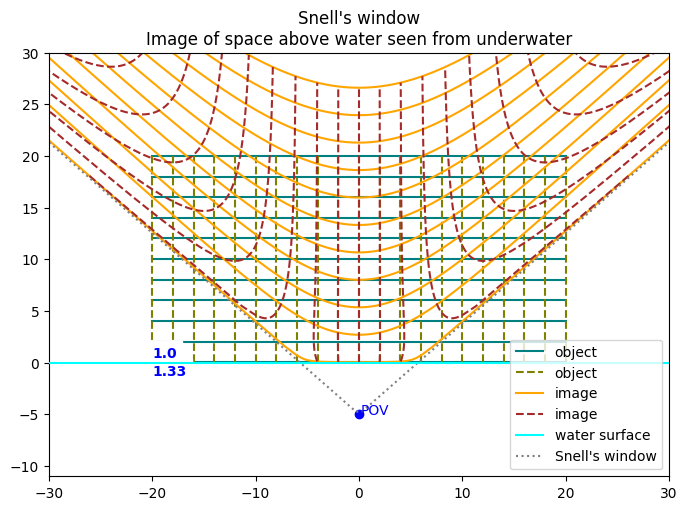

In [52]:
# Exclude the water surface from the y-value range and include the
# immediate upper part: y >= delta
obj2 = xygrid([-20,20], [delta,20], 20, 10)

obj2.hors[0].label = 'object'
obj2.vers[0].label = 'object'

pov3 = [0, -5]
nrel2 = n_air/n_water
img3 = refraction_image(obj2, pov3, nrel2)

plt.figure(figsize=(8, 6))
plt.axes().set_aspect('equal')
plt.xlim(-30, 30)
plt.ylim(-11, 30)

obj2.draw()
img3.draw()

# Snell's window by theory
sc = nrel2
cc = np.sqrt(1-nrel2**2)
k2 = cc / sc
y1f = lambda x: pov3[1] + k2 * (x - pov3[0])
y2f = lambda x: pov3[1] - k2 * (x - pov3[0])
yf = np.vectorize(lambda x: y1f(x) if x >= pov3[0] else y2f(x))
xmin, xmax = -30, 30
xs = np.linspace(xmin, xmax, 100)
ys = yf(xs)
plt.plot(xs, ys, 'gray', ls=':', label='Snell\'s window')
plt.legend(loc='lower right')

plt.title("Snell's window\nImage of space above water seen from underwater")
plt.savefig('snell_window.png')
plt.savefig('snell_window.svg')

* While the vertical appearance directly above the  Snell's window is seen as being further away with a distance that is nearly proportional to the refractive index ratio without much distortion, the outer part of Snell's window shows a distortion where the direction converges into a cone while the distance increases. This distortion is particularly severe near the water surface.

In [53]:
img3.himgs[0].imageloc.T[0].min()

-1411722.4685739113

# Analytical Solution

The image location can be obtained analytically by solving the equation for the tangent from the viewpoint to the astroid.
$\newcommand{xv}{{x_{\mathrm{v}}}}
\newcommand{yv}{{y_{\mathrm{v}}}}$

Let the coordinates of the viewpopint be $(\xv, \yv)$, and $\xi=\dfrac{\xv-C}{M}$, $\eta=\dfrac{\yv}{N}$, and let the tangent point to the curve $|\xi|^{2/3}+|\eta|^{2/3}=1$ be $(\alpha^3, \beta^3)$. The tangent line cuts $\xi-$ and $\eta-$ axes at $(\alpha, 0)$ and $(0, \beta)$, respectively. Thus we have the equation of proportion,
$$ \dfrac{\eta}{\xi-\alpha} = -\dfrac{\beta}{\alpha}.$$

From this, we have
$$\alpha\eta = \beta(\alpha-\xi).$$

Using $\beta = \pm \sqrt{1-\alpha^2}$, and squaring both sides, we have
$$ \alpha^2 \eta^2 = (1-\alpha^2)(\alpha - \xi)^2$$

This leads to a quartic equation for $\alpha$. The solution to a quartic equation can be obtained by using the SymPy package, but the solution is given in complex form. We can select the physically meaningful solution by filtering out the real ones and then choosing the value of $\alpha$ between zero and $\xi$.

In [55]:
ksi, eta, alfa = sym.symbols('xi eta alpha')
ksi, eta, alfa

(ξ, η, α)

In [56]:
def between(x, a, b):
  if a > b:
    a, b = b, a
  return a <= x <= b

between = np.vectorize(between, excluded=[1,2])

In [57]:
eqn = (alfa - ksi)**2 * (1 - alfa**2) - alfa**2 * eta**2
eqn

   2  2   ⎛     2⎞        2
- α ⋅η  + ⎝1 - α ⎠⋅(α - ξ) 

In [58]:
# Solutions to the quartic equation for Alpha in expressions of Xi and Eta
AlphaSol = sym.solve(eqn, alfa)

In [59]:
#AlphaSol

In [60]:
# Make a calculable function of out of the the solution
alphasolf = sym.lambdify((Xi, Eta), AlphaSol);

In [ ]:
alphavals = np.array(alphasolf(1,-1));

In [62]:
alphavals

array([-0.88320351+0.j,  0.46898994+0.j,         nan+0.j,         nan+0.j])

In [63]:
# Filter for relavant solution
select = ((np.imag(alphavals)==0.0) * between(np.real(alphavals), 0.0, 1))
select

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in func (vectorized)
  outputs = ufunc(*inputs)


array([False,  True, False, False])

In [67]:
# The relevant solution
alphasol = (np.real(alphavals))[select][0]
alphasol

0.4689899435404308

In [68]:
# the abscissa of the point of tangency in ξη - plane
alphasol**3

0.10315507305558232

In [69]:
betasol = np.sqrt(1-alphasol**2)
betasol

0.8832035059135259

In [70]:
# the ordinate of the point of tangency in ξη - plane
betasol**3

0.6889415106824874

In [71]:
# Function to calculate the image position, given POV, OBJ, and nrel
def imgloc(pov, obj, nrel):
  """
  pov: [xp, yp]; viewpoint
  obj: [xo, yo]; position of the object
  nrel: relative index of refraction of the medium of the object w.r.t. that of the POV
        nrel = nOBJ / nPOV
  === return values ===
  img: [xim, yim]; image position
  poi: [xpoi, 0]; point of incidence
  """
  xv, yv = pov
  xo, yo = obj
  M = yo / np.sqrt(nrel**2 - 1)
  N = yo / nrel
  xi = (xv - xo) / M
  eta = yv / N

  # Solve for alpha in xi-eta plane
  alpha_candidates = alphasolf(xi, eta)
  select = ((np.imag(alpha_candidates)==0.0) * between(np.real(alpha_candidates), 0.0, xi))
  alpha = (np.real(alpha_candidates))[select][0]
  beta = np.sqrt(1 - alpha**2)

  # transform the solution into xy-plane
  xim = alpha**3 * M + xo
  yim = beta**3 * N

  # the point of incidence is the intersection point of the tangent line and the x-axis
  xpoi = (xim*yv - yim*xv)/(yv - yim)

  img = np.array([xim, yim])
  poi = np.array([xpoi, 0])

  return img, poi

In [ ]:
pov = [0,1]
obj = [1, -1]
img, poi = imgloc(pov, obj, n_water/n_air)


In [74]:
xs, ys = np.array([img, pov, poi, obj]).T

In [75]:
alim = np.abs(obj[1]) / np.sqrt((n_water/n_air)**2 - 1)
avals = np.linspace(-alim, alim, 201)
ps = ((n_water/n_air)**2 - 1) * (avals/obj[1])**2
xis = obj[0] + ps * avals
yis = -np.abs(obj[1]) / nrel * ( 1 - ps ) ** 1.5

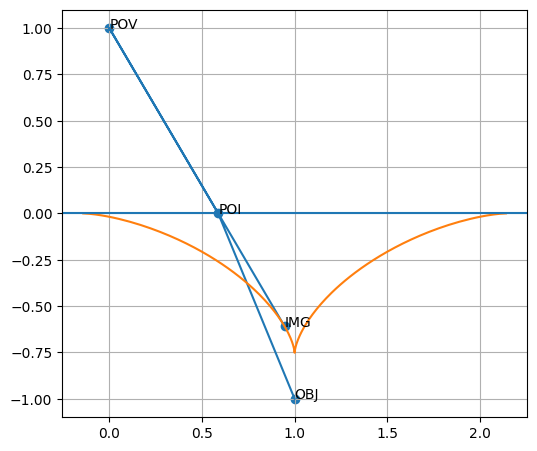

In [79]:
plt.figure(figsize=(6, 6))
plt.axes().set_aspect('equal')
plt.grid()

plt.scatter(xs, ys)
plt.plot(xs, ys)
plt.plot(xis, yis)

plt.text(obj[0], obj[1], 'OBJ')
plt.text(pov[0], pov[1], 'POV')
plt.text(img[0], img[1], 'IMG')
plt.text(poi[0], poi[1], 'POI')

plt.axhline(0.0)